# Part 1: Exploratry Data Analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('hw5_data.csv').drop('Date',axis=1)
df

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,6.1632,6.6192,6.9560,7.2403,7.4888,7.7032,7.8831,8.0295,8.1454,8.2350,...,8.4777,8.4787,8.4794,8.4799,8.4802,8.4804,8.4805,8.4806,8.4807,2.942279
8067,6.2091,6.6589,6.9843,7.2634,7.5140,7.7355,7.9250,8.0814,8.2067,8.3044,...,8.5737,8.5748,8.5756,8.5761,8.5764,8.5767,8.5768,8.5769,8.5770,2.942279
8068,6.2195,6.6790,7.0240,7.3172,7.5738,7.7951,7.9805,8.1314,8.2507,8.3430,...,8.5936,8.5946,8.5953,8.5958,8.5961,8.5963,8.5965,8.5966,8.5966,2.942279
8069,6.2215,6.6978,7.0637,7.3688,7.6270,7.8421,8.0168,8.1551,8.2619,8.3428,...,8.5503,8.5511,8.5516,8.5519,8.5522,8.5523,8.5524,8.5525,8.5525,2.942279


## Visaulization of time series of target variable

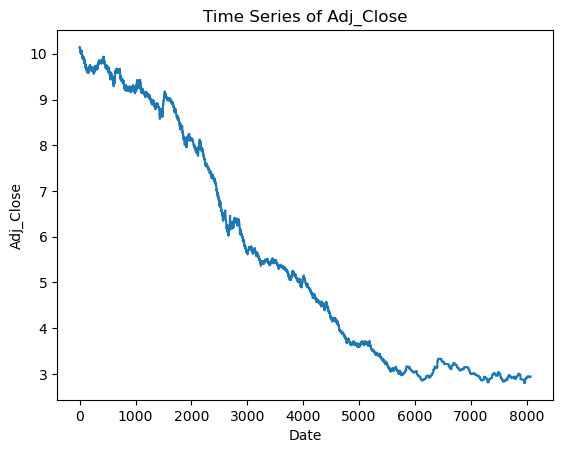

In [2]:
import matplotlib.pyplot as plt

plt.plot(df['Adj_Close'])
plt.title('Time Series of Adj_Close')
plt.xlabel('Date')
plt.ylabel('Adj_Close')
plt.show()

### Preprocessing for Support Vector Machine model
- Split train and test split for multiple features
- Use random_state=42, 80% of the data for training set
- Implement a linear regression and SVM regressor model

In [3]:
from sklearn.model_selection import train_test_split

target = 'Adj_Close'
X, y = df.iloc[:, :-1], df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

# Part 2: Perform a PCA on the Treasury Yield dataset
- Standardize the features
- Perform PCA
- Compute explained variance ratio for all components
- Recalculate explained variance ratio for n_components=3
- Compute cumulative explained variance of the 3 component

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

explained_variance_ratio_3 = pca3.explained_variance_ratio_
print('Explained variance ratio for n_components=3:\n', 
      explained_variance_ratio_3)

cumulative_explained_variance_3 = np.sum(explained_variance_ratio_3)
print('Cumulative explained variance of the 3 component version:\n', 
      cumulative_explained_variance_3)

Explained variance ratio for n_components=3:
 [0.93155158 0.04103814 0.02175719]
Cumulative explained variance of the 3 component version:
 0.9943469070485446


# Part 3: Linear Regression, SVM regressor

## Linear Regression on baseline (all attributes)
- Implement linear regression as ML model
- Fit model on training data (Empirical risk minimization)
- Calculate performance of model

In [5]:
from sklearn.linear_model import LinearRegression

base_clf = LinearRegression()
base_clf.fit(X_train, y_train)
y_train_preds = base_clf.predict(X_train)
y_test_preds = base_clf.predict(X_test)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_train_preds)
mse_test = mean_squared_error(y_test, y_test_preds)
r2_train = r2_score(y_train, y_train_preds)
r2_test = r2_score(y_test, y_test_preds)

print("Linear Regression Model Performance on baseline:")
print("MSE (train): {}".format(mse_train))
print("MSE (test): {}".format(mse_test))
print("R2 score (train): {}".format(r2_train))
print("R2 score (test): {}".format(r2_test))


Linear Regression Model Performance on baseline:
MSE (train): 0.6000656322263141
MSE (test): 0.6235016902865209
R2 score (train): 0.9028303049946047
R2 score (test): 0.9013682631945382


## SVM Regressor on baseline (all attributes)
- Implement SVM regressor as ML model
- Fit model on training data (Empirical risk minimization)
- Calculate performance of model

In [7]:
from sklearn.svm import SVR

base_svr = SVR(kernel='rbf')
base_svr.fit(X_train, y_train)
y_train_preds = base_svr.predict(X_train)
y_test_preds = base_svr.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_train_preds)
mse_test = mean_squared_error(y_test, y_test_preds)
r2_train = r2_score(y_train, y_train_preds)
r2_test = r2_score(y_test, y_test_preds)

print("Support Vector Regressor Model Performance on baseline:")
print("MSE (train): {}".format(mse_train))
print("MSE (test): {}".format(mse_test))
print("R2 score (train): {}".format(r2_train))
print("R2 score (test): {}".format(r2_test))


Support Vector Regressor Model Performance on baseline:
MSE (train): 0.07203035884369534
MSE (test): 0.0692882597468014
R2 score (train): 0.9883359958909773
R2 score (test): 0.9890392896995764


## Linear Regression on baseline (3 attributes)
- Split preprocessed data by PCA into train and test data
- Implement linear regression as ML model
- Fit model on training data (Empirical risk minimization)
- Calculate performance of model

In [9]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca3,
                                                           y,
                                                           test_size=0.2,
                                                           random_state=1)


In [10]:
from sklearn.linear_model import LinearRegression

pca_clf = LinearRegression()
pca_clf.fit(X_train_pca, y_train)
y_train_preds_pca = pca_clf.predict(X_train_pca)
y_test_preds_pca = pca_clf.predict(X_test_pca)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train_pca3 = mean_squared_error(y_train, y_train_preds_pca)
mse_test_pca3 = mean_squared_error(y_test, y_test_preds_pca)
r2_train_pca3 = r2_score(y_train, y_train_preds_pca)
r2_test_pca3 = r2_score(y_test, y_test_preds_pca)

print("Linear Regression Model Performance on baseline:")
print("MSE (train): {}".format(mse_train_pca3))
print("MSE (test): {}".format(mse_test_pca3))
print("R2 score (train): {}".format(r2_train_pca3))
print("R2 score (test): {}".format(r2_test_pca3))

Linear Regression Model Performance on baseline:
MSE (train): 0.8314687154798711
MSE (test): 0.8015059814643813
R2 score (train): 0.8667326825013004
R2 score (test): 0.8679091173689514


## SVM Regressor on baseline (3 attributes)
- Implement SVM regressor as ML model
- Fit model on training data (Empirical risk minimization)
- Calculate performance of model

In [12]:
from sklearn.svm import SVR

pca_svr = SVR(kernel='rbf')
pca_svr.fit(X_train_pca, y_train)
y_train_preds_pca = pca_svr.predict(X_train_pca)
y_test_preds_pca = pca_svr.predict(X_test_pca)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train_pca3 = mean_squared_error(y_train, y_train_preds_pca)
mse_test_pca3 = mean_squared_error(y_test, y_test_preds_pca)
r2_train_pca3 = r2_score(y_train, y_train_preds_pca)
r2_test_pca3 = r2_score(y_test, y_test_preds_pca)

print("SVM Regression Model Performance on baseline:")
print("MSE (train): {}".format(mse_train_pca3))
print("MSE (test): {}".format(mse_test_pca3))
print("R2 score (train): {}".format(r2_train_pca3))
print("R2 score (test): {}".format(r2_test_pca3))

SVM Regression Model Performance on baseline:
MSE (train): 0.13813466090618418
MSE (test): 0.13494714186196977
R2 score (train): 0.9778598576593044
R2 score (test): 0.9777602569546425


# Part 4: Conclusions

- In case of untransformed data by PCA, SVM regressor model is totally outperforming the linear regression model, not only in-sample but also out-of-sample. 
- However, on PCA transformed data, linear regression model is outperforming the linear regression model based on mean squared error.